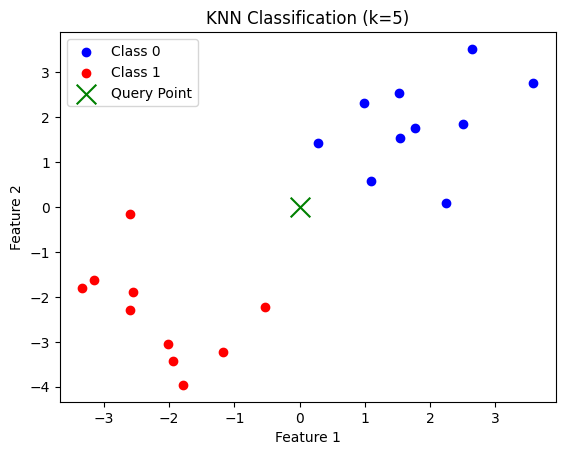

The query point belongs to Class 0.0.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def compute_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def knn_classifier(train_data, train_labels, query_point, k):
    distances = []

    for i in range(len(train_data)):
        dist = compute_distance(train_data[i], query_point)
        distances.append((dist, train_labels[i]))

    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]

    classes = [label for _, label in nearest_neighbors]
    majority_class = Counter(classes).most_common(1)[0][0]

    return majority_class

np.random.seed(42)
class_1 = np.random.randn(10, 2) + np.array([2, 2])
class_2 = np.random.randn(10, 2) + np.array([-2, -2])

train_features = np.vstack((class_1, class_2))
train_labels = np.hstack((np.zeros(10), np.ones(10)))

query = np.array([0, 0])

k_value = 5

predicted_class = knn_classifier(train_features, train_labels, query, k_value)

plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label="Class 0")
plt.scatter(class_2[:, 0], class_2[:, 1], color='red', label="Class 1")
plt.scatter(query[0], query[1], color='green', marker="x", s=200, label="Query Point")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN Classification (k={k_value})")
plt.legend()
plt.show()

print(f"The query point belongs to Class {predicted_class}.")
